<a href="https://colab.research.google.com/github/BahareMoradi/CNN-for-image-classification/blob/master/CNN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network for image classification

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
import numpy as np
import tensorflow as tf 
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator # !!!

## Loading the images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Computer vision/Computer Vision Masterclass/Datasets/homer_bart_2.zip'
zip_file = zipfile.ZipFile(file= path, mode='r')
zip_file.extractall('./')
zip_file.close()

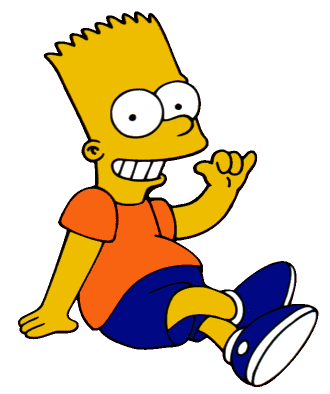

In [4]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart110.bmp')

## Train and test set

In [5]:
# We can configure some parameters to make modifications to the original images, 
# which is very useful when we have few images of each class. 
# As you can see here, there are many other parameters that can be configured. 
# Using this function, in addition to the original images, we will also have new images 
# with application of these pre-processing
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        zoom_range=0.2,
                                        horizontal_flip=True)

In [6]:
# Indicates that the images will be accessed every eight. As we have few images, we put this small value

# As the name suggests, this parameter will mix the images, 
# they will be accessed in a completely random order to prevent the neural network 
# from memorizing the order of the images. Otherwise, the neural network could 
# learn the order of the images and not their features
training_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                          target_size=(64,64),
                                                          batch_size= 8,
                                                          class_mode='categorical',
                                                          shuffle = True)


Found 215 images belonging to 2 classes.


In [7]:
training_dataset.class_indices

{'bart': 0, 'homer': 1}

In [8]:
# To test, we set this parameter to FALSE because when testing, 
# the order of the images makes no difference. 
# If we leave the value equals TRUE, we will not be able to associate the 
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                  target_size=(64, 64),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 54 images belonging to 2 classes.


## Building and training the neural network

In [9]:
130/2

65.0

In [10]:
ann = Sequential()
ann.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))
ann.add(MaxPooling2D(pool_size=(2,2)))

ann.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
ann.add(MaxPooling2D(pool_size=(2,2)))

ann.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
ann.add(MaxPooling2D(pool_size=(2,2)))

ann.add(Flatten())

ann.add(Dense(units=577, activation='relu'))
ann.add(Dense(units=577, activation='relu'))
ann.add(Dense(units=2, activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [11]:
ann.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = ann.fit_generator(training_dataset, epochs=50 , validation_data=test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
27/27 [==============================] - 3s 81ms/step - loss: 0.6706 - accuracy: 0.6047 - val_loss: 0.5861 - val_accuracy: 0.6852
Epoch 2/50
27/27 [==============================] - 2s 73ms/step - loss: 0.5448 - accuracy: 0.7442 - val_loss: 0.5095 - val_accuracy: 0.8333
Epoch 3/50
27/27 [==============================] - 2s 76ms/step - loss: 0.5087 - accuracy: 0.7674 - val_loss: 0.3451 - val_accuracy: 0.8333
Epoch 4/50
27/27 [==============================] - 2s 75ms/step - loss: 0.4744 - accuracy: 0.7860 - val_loss: 0.4119 - val_accuracy: 0.8333
Epoch 5/50
27/27 [==============================] - 2s 76ms/step - loss: 0.4135 - accuracy: 0.8233 - val_loss: 0.4328 - val_accuracy: 0.7407
Epoch 6/50
27/27 [==============================] - 2s 72ms/step - loss: 0.3490 - accuracy: 0.8372 - val_loss: 0.4809 - val_accuracy: 0.7407
Epoch 7/50
27/27 [==============================] - 2s 74ms/step - loss: 0.3140 - accuracy: 0.8558 - val_loss: 0.3277 - val_accuracy: 0.8704
Epoch 8/50
27

## Evaluating the neural network

In [13]:
predictions = ann.predict(test_dataset)


In [14]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [15]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes ,predictions)

0.8703703703703703

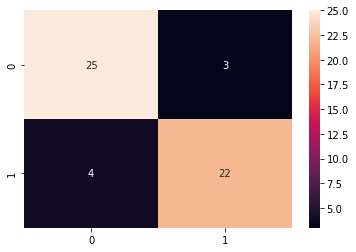

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm , annot=True)

In [18]:
# The neural network can correctly identify 75% of the bart images and when it 
# identifies these bart images, it is correct 68% of the time
# We can conclude that this neural network is better for classifying bart images, as 
# we saw in the confusion matrix
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.88      0.85      0.86        26

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



## Saving and loading the model

In [19]:
json_model = ann.to_json()
with open('cnn.json', 'w') as json_file:
  json_file.write(json_model)

In [20]:
from keras.models import save_model
ann_saved = save_model(ann, '/content/weights.hdf5')

In [21]:
with open('cnn.json', 'r')as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [22]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0